In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'E:\\Datasets\\Kaggle DL\\CNN\\Chest X-Ray\\test',
    shuffle = True, 
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 316 files belonging to 2 classes.


In [5]:
class_names = dataset.class_names
class_names

['NORMAL', 'PNEUMONIA']

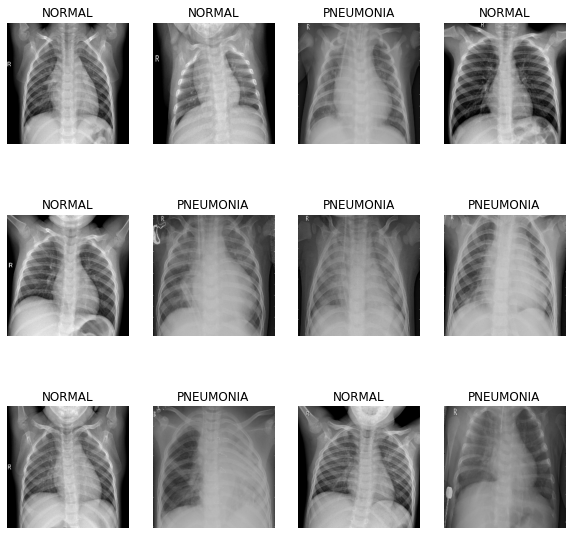

In [10]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        actual_class = class_names[label_batch[i]]
        plt.title(f'{actual_class}')

In [11]:
model = tf.keras.models.load_model('../models/chest_x_ray_pneumonia_detection.h5')

NORMAL


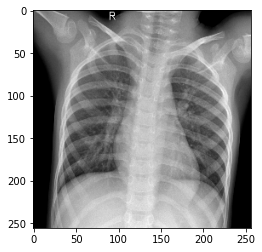

In [12]:
for images_batch, labels_batch in dataset.take(1):
    
    plt.imshow(images_batch[0].numpy().astype('uint8'))
    
    prediction = model.predict(images_batch)
    print(class_names[np.argmax(prediction[0])])

In [13]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    prediction = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])), 2)
    return predicted_class, confidence

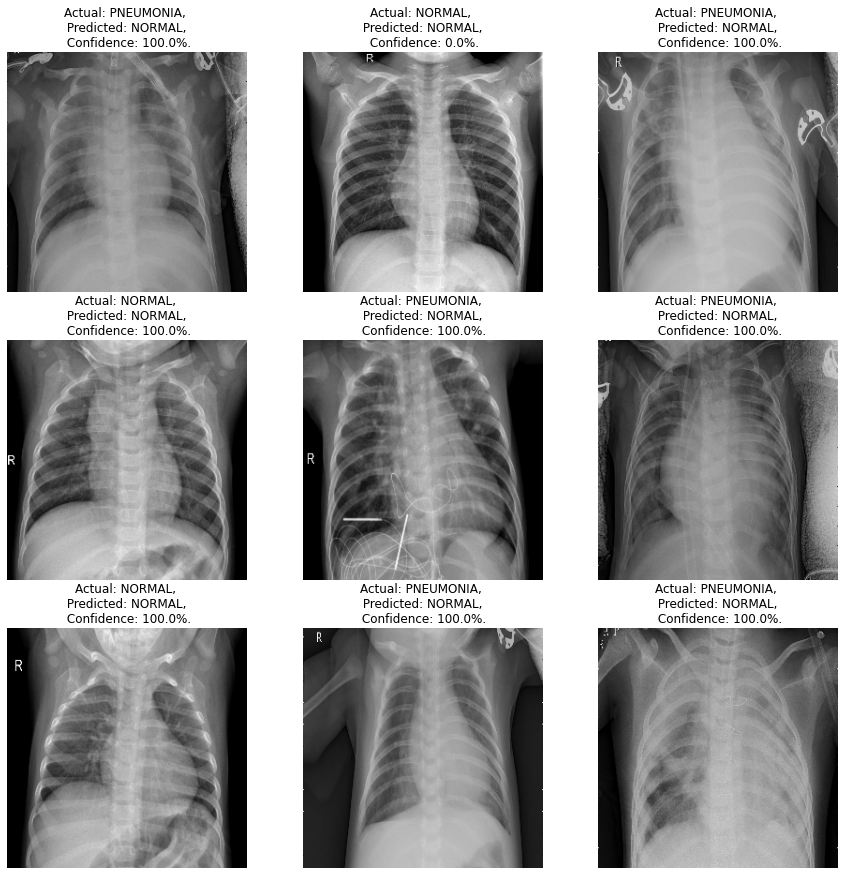

In [14]:
plt.figure(figsize = (15,15))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%.')